In [2]:
# 단순 Circle 모양과 X 모양을 구분해내는 프로그램
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

# 이미지를 감지하기 위한 클래스인 ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

np.random.seed(2)

In [3]:
train_datagen = ImageDataGenerator(rescale = 1/255)

# 총 40개의 훈련셋이 들어있는 경로와 크기를 확인하고
# 배치 사이즈는 4로 하여 총 5번 수행하면 한 epoch가 수행됨
train_generator = train_datagen.flow_from_directory(
                                'circle_X/train',
                                target_size=(25, 25), 
                                batch_size = 2,
                                class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
                                'circle_X/test',
                                target_size = (25, 25),
                                batch_size = 2,
                                class_mode = 'binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
model = Sequential()
# 필터 수를 32, 64, 128로 늘려감 
# 중간 레이어가 3*3을 고정하여 만듦, 인풋 이미지 사이즈는 25*25이고, RGB라서 3으로(RGB는 필요 없지만)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(24, 24, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# 핵심 부분만 선정하는 MaxPooling2D로 1/2 해 줌
model.add(MaxPooling2D(2))
# 한 줄로 줄세우고
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# 최종적으로 둘 중에 분류하는 것이므로 0.5 이상 미만으로 나눔
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 838,849
Trainable params: 838,849
Non-trainable params: 0
__________________________________________________

In [6]:
# 두 개를 비교하므로 이진 분류를 이용함
# 가장 대중적인 adam 최적화 기법을 사용함
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [7]:
# batch_size가 2이므로 훈련 개수에 따라 에폭시를 20, 10으로 결정함
history = model.fit_generator(
        train_generator,
        steps_per_epoch=20,
        epochs=30,
        validation_data=test_generator,
        validation_steps=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
20/20 [==============================] - 0s 21ms/step - loss: 0.5585 - accuracy: 0.6000 - val_loss: 0.4267 - val_accuracy: 0.7500
Epoch 2/30
20/20 [==============================] - 0s 12ms/step - loss: 0.1459 - accuracy: 0.9250 - val_loss: 0.7193 - val_accuracy: 0.7000
Epoch 3/30
20/20 [==============================] - 0s 13ms/step - loss: 0.0399 - accuracy: 0.9750 - val_loss: 0.8712 - val_accuracy: 0.7000
Epoch 4/30
20/20 [==============================] - 0s 13ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.9249 - val_accuracy: 0.7000
Epoch 5/30
20/20 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.8837 - val_accuracy: 0.7000
Epoch 6/30
20/20 [==============================] - 0s 13ms/step - loss: 7.0519e-04 - accuracy: 1.0000 - val_loss: 1.0673 - val_accuracy: 0.7000
Epoch 7/30
20/20 [==============================] - 0s 14ms/step - loss: 4

79.4% 확률로 원


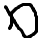

In [8]:
from keras.preprocessing.image import load_img, img_to_array
from IPython.display import Image

# 임의로 그린 동그라미와 엑스 중 애매한 그림을 보여줬을 때 반응 확인
img = load_img('1.png', target_size=(24, 24, 3))
x = img_to_array(img)

x = x.reshape((1,) + x.shape)
x /= 255

y = model.predict(x)[0][0]
y = round(float(y), 3)

if y > 0.5:
    print(str(y*100) + "% 확률로 원")
else:
    print(str((1-y) * 100) + "% 확률로 엑스")
Image(filename='1.png')

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터를 이리저리 굴리면서 추가로 학습해주자
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

<class 'numpy.ndarray'>


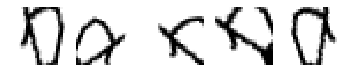

In [21]:
%matplotlib inline
# 만약 위 datagen을 사용하게 되면 아래 처럼 그림을 바꿔가며 생성해줌
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img('1.png', target_size=(25, 25))
x = img_to_array(img)
print(type(x))
x = x.reshape((1,) + x.shape)

i = 0;
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(1, 5, i+1)
    plt.axis('off')  # 불필요한 그래프 틀과 라벨 없애기
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break

In [23]:
# 훈련 데이터셋을 실제로 섞어보자
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,      # 랜덤으로 돌리기
    width_shift_range=0.2,  # 이동시키기
    height_shift_range=0.2, # 이동시키기
    shear_range=0.2,  # 기울이기
    zoom_range=0.2,   # 확대 축소하기
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    'circle_X/train',
    target_size=(25, 25),
    batch_size=2,
    class_mode='binary')

validation_generattor = val_datagen.flow_from_directory(
    'circle_X/test',
    target_size=(25, 25),
    batch_size=2,
    class_mode='binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 838,849
Trainable params: 838,849
Non-trainable params: 0
__________________________________________________

In [25]:
# 다시 새로 학습해준다
history = model.fit_generator(
        train_generator,
        steps_per_epoch=20,
        epochs=30,
        validation_data=test_generator,
        validation_steps=10)

Epoch 1/30
20/20 [==============================] - 0s 13ms/step - loss: 1.2992 - accuracy: 0.5750 - val_loss: 0.6061 - val_accuracy: 0.6000
Epoch 2/30
20/20 [==============================] - 0s 12ms/step - loss: 0.5258 - accuracy: 0.8250 - val_loss: 0.6690 - val_accuracy: 0.6500
Epoch 3/30
20/20 [==============================] - 0s 13ms/step - loss: 0.5939 - accuracy: 0.7250 - val_loss: 0.6327 - val_accuracy: 0.7000
Epoch 4/30
20/20 [==============================] - 0s 12ms/step - loss: 0.4734 - accuracy: 0.8250 - val_loss: 0.5741 - val_accuracy: 0.7500
Epoch 5/30
20/20 [==============================] - 0s 13ms/step - loss: 0.6795 - accuracy: 0.6250 - val_loss: 0.5599 - val_accuracy: 0.6000
Epoch 6/30
20/20 [==============================] - 0s 13ms/step - loss: 0.5004 - accuracy: 0.7000 - val_loss: 0.4872 - val_accuracy: 0.6500
Epoch 7/30
20/20 [==============================] - 0s 16ms/step - loss: 0.5014 - accuracy: 0.7750 - val_loss: 0.4256 - val_accuracy: 0.8000
Epoch 8/30
20

100.0% 확률로 원


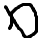

In [27]:
# 재학습된 모델에 아까 79.4%가 나온 원을 넣었을 때 100%로 상승한 것을 볼 수 있다
img = load_img('1.png', target_size=(24, 24, 3))
x = img_to_array(img)

x = x.reshape((1,) + x.shape)
x /= 255

y = model.predict(x)[0][0]
y = round(float(y), 3)

if y > 0.5:
    print(str(y*100) + "% 확률로 원")
else:
    print(str((1-y) * 100) + "% 확률로 엑스")
Image(filename='1.png')